In [1]:
import pandas
import numpy
import time
from datetime import datetime as dt
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_context("notebook", font_scale=1.3)

In [10]:
# data_read = pandas.read_csv('x-ANACONDA/NLU-DH21HM/Week04-Sequence_Array/Exercise/IP04-exercise.csv')
data_read = pandas.read_csv('IP04-exercise.csv')
data_read.head()
# print(data_read.head())
data_read.info()
# data_read.set_index('NOC', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     13 non-null     object
 1   Gold    13 non-null     int64 
 2   Silver  13 non-null     int64 
 3   Bronze  13 non-null     int64 
 4   Total   13 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 648.0+ bytes


In [11]:
countries = data_read[['NOC']]
# print(countries)
gold = data_read[['Gold']]
# gold
silver = data_read[['Silver']]
# silver
bronze = data_read[['Bronze']]
# bronze

In [12]:
countries = data_read.NOC.values
print(countries)
gold = data_read.Gold.values
print(gold)
silver = data_read.Silver.values
print(silver)
bronze = data_read.Bronze.values
print(bronze)

['Austria' 'Canada' 'France' 'Germany' 'Italy' 'Japan' 'Netherlands'
 'Norway' 'Russia' 'South Korea' 'Sweden' 'Swizerland' 'United State']
[ 5 11  5 14  3  4  8 14  2  5  7  5  9]
[ 3  8  4 10  2  5  6 14  6  8  6  6  8]
[ 6 10  6  7  5  4  6 11  9  4  1  4  6]


In [35]:
gold_sum = []
def medal_compute(gold, silver, bronze):
    for i in range(len(gold)):
        gold_sum.append(gold[i] + silver[i]/2 + bronze[i]/3)
    return gold_sum

In [36]:
medal_sum = medal_compute(gold, silver, bronze)
medal_sum = numpy.round(medal_sum, 2)
medal_sum

array([ 8.5 , 18.33,  9.  , 21.33,  5.67,  7.83, 13.  , 24.67,  8.  ,
       10.33, 10.33,  9.33, 15.  ])

In [39]:
sort_list = []
for i in range(len(countries)):
    sort_list.append((medal_sum[i], countries[i]))
sort_list

[(8.5, 'Austria'),
 (18.33, 'Canada'),
 (9.0, 'France'),
 (21.33, 'Germany'),
 (5.67, 'Italy'),
 (7.83, 'Japan'),
 (13.0, 'Netherlands'),
 (24.67, 'Norway'),
 (8.0, 'Russia'),
 (10.33, 'South Korea'),
 (10.33, 'Sweden'),
 (9.33, 'Swizerland'),
 (15.0, 'United State')]

In [41]:
sort_list.reverse()
print(sort_list)

[(24.67, 'Norway'), (21.33, 'Germany'), (18.33, 'Canada'), (15.0, 'United State'), (13.0, 'Netherlands'), (10.33, 'Sweden'), (10.33, 'South Korea'), (9.33, 'Swizerland'), (9.0, 'France'), (8.5, 'Austria'), (8.0, 'Russia'), (7.83, 'Japan'), (5.67, 'Italy')]


In [42]:
rank_list = []
for i in range(len(countries)):
    rank_list.append((i+1, sort_list[i]))
rank_list

[(1, (24.67, 'Norway')),
 (2, (21.33, 'Germany')),
 (3, (18.33, 'Canada')),
 (4, (15.0, 'United State')),
 (5, (13.0, 'Netherlands')),
 (6, (10.33, 'Sweden')),
 (7, (10.33, 'South Korea')),
 (8, (9.33, 'Swizerland')),
 (9, (9.0, 'France')),
 (10, (8.5, 'Austria')),
 (11, (8.0, 'Russia')),
 (12, (7.83, 'Japan')),
 (13, (5.67, 'Italy'))]

In [43]:
dict_save = {'rank': rank_list}
# pandas.DataFrame(dict_save).to_csv('IP04-exercise-save.csv')
pandas.DataFrame(dict_save).to_csv('IP04-exercise-ranked.csv', header=True, index=False)

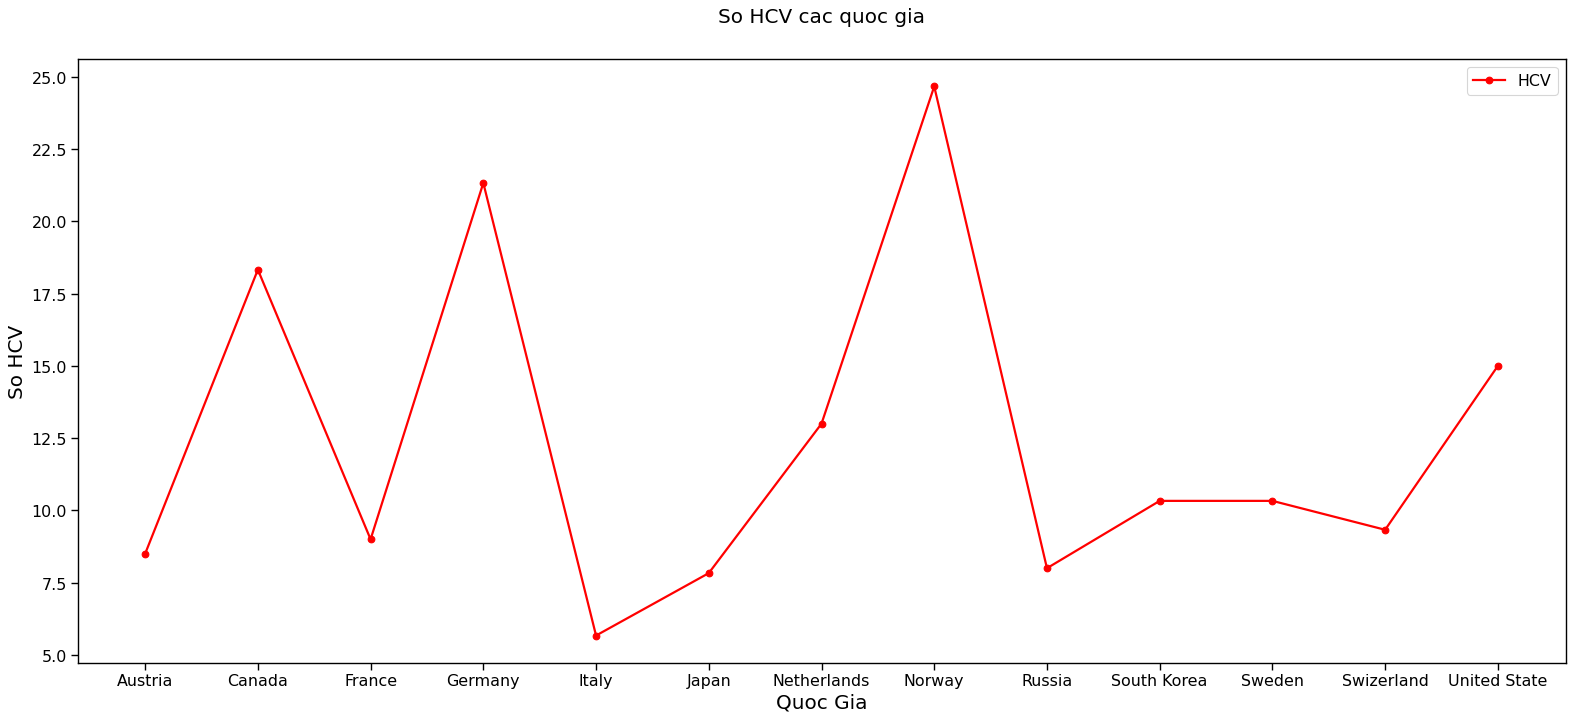

In [53]:
figure(figsize=(24, 10), dpi=80)
plt.title('So HCV cac quoc gia', fontsize=18, y=1.05)
plt.ylabel('So HCV', fontsize=18)
plt.xlabel('Quoc Gia', fontsize=18)
data_read_plot = medal_sum
plt.plot(countries, data_read_plot, 'ro-', linewidth=2, label='HCV')
plt.legend(['HCV'])
plt.show()